# PyTorch training

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Quick start

In [5]:
training_data = datasets.FashionMNIST(
    root="Data",
    train=True,
    download=True,
    transform=ToTensor())

100.0%


Extracting Data\FashionMNIST\raw\train-images-idx3-ubyte.gz to Data\FashionMNIST\raw



100.0%


Extracting Data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to Data\FashionMNIST\raw



100.0%


Extracting Data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to Data\FashionMNIST\raw



100.0%

Extracting Data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to Data\FashionMNIST\raw



In [6]:
test_data = datasets.FashionMNIST(
    root="Data",
    train=False,
    download=True,
    transform=ToTensor())

In [18]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X,y in test_dataloader:
    print("Shape of X [N,C,H,W]:",X.shape)
    print("Shape of y:",y.shape, y.dtype)
    break

Shape of X [N,C,H,W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


pas de fou compris mais en gros taille 64

In [12]:
device = (
    "cuda" if torch.cuda.is_available()
    else "cpu"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

Now we want to train

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)

        # Compute prediction error

        pred = model(X)
        loss = loss_fn(pred,y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%100 == 0:
            loss, current = loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [15]:
def test(dataloader, model, loss_fn):
    size = len(dataloader)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [19]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader,model,loss_fn,optimizer)
    test(test_dataloader,model,loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310750 [   64/60000]
loss: 2.301026 [ 6464/60000]
loss: 2.295597 [12864/60000]
loss: 2.293096 [19264/60000]
loss: 2.275095 [25664/60000]
loss: 2.259380 [32064/60000]
loss: 2.271753 [38464/60000]
loss: 2.252720 [44864/60000]
loss: 2.250190 [51264/60000]
loss: 2.232636 [57664/60000]
Test Error: 
 Accuracy: 2177.1%, Avg loss: 2.230599 

Epoch 2
-------------------------------
loss: 2.246064 [   64/60000]
loss: 2.238172 [ 6464/60000]
loss: 2.216424 [12864/60000]
loss: 2.218455 [19264/60000]
loss: 2.160670 [25664/60000]
loss: 2.146877 [32064/60000]
loss: 2.161301 [38464/60000]
loss: 2.128440 [44864/60000]
loss: 2.145337 [51264/60000]
loss: 2.085400 [57664/60000]
Test Error: 
 Accuracy: 3245.2%, Avg loss: 2.097841 

Epoch 3
-------------------------------
loss: 2.150029 [   64/60000]
loss: 2.127103 [ 6464/60000]
loss: 2.087420 [12864/60000]
loss: 2.082872 [19264/60000]
loss: 1.958241 [25664/60000]
loss: 1.965211 [32064/60000]
loss: 1.975884 [38

To save / load

In [20]:
torch.save(model.state_dict(),"model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [22]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [25]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]

model.eval()
x,y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle Boot", Actual: "Ankle Boot"


## TENSORS

from random data 

In [30]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


from a numpy array

In [27]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

from another tensor

In [28]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7165, 0.0670],
        [0.7727, 0.2409]]) 



with random / constant val

In [31]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.6081, 0.0163, 0.7000],
        [0.3705, 0.2430, 0.4944]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



Attribute of a Tensor

In [32]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


test operation (https://pytorch.org/docs/stable/torch.html)

In [38]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(tensor)
print(tensor.adjoint())

print(
    tensor[1][1],
tensor[1,:],
tensor[:,1])


tensor([[0.7996, 0.6553, 0.0637, 0.9744],
        [0.8335, 0.2038, 0.8259, 0.2494],
        [0.7871, 0.0456, 0.8692, 0.2117]])
tensor([[0.7996, 0.8335, 0.7871],
        [0.6553, 0.2038, 0.0456],
        [0.0637, 0.8259, 0.8692],
        [0.9744, 0.2494, 0.2117]])
tensor(0.2038) tensor([0.8335, 0.2038, 0.8259, 0.2494]) tensor([0.6553, 0.2038, 0.0456])


np / tensor exchange

In [39]:
n = np.ones(5)
t = torch.from_numpy(n)

## datasets & dataloader

In [41]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

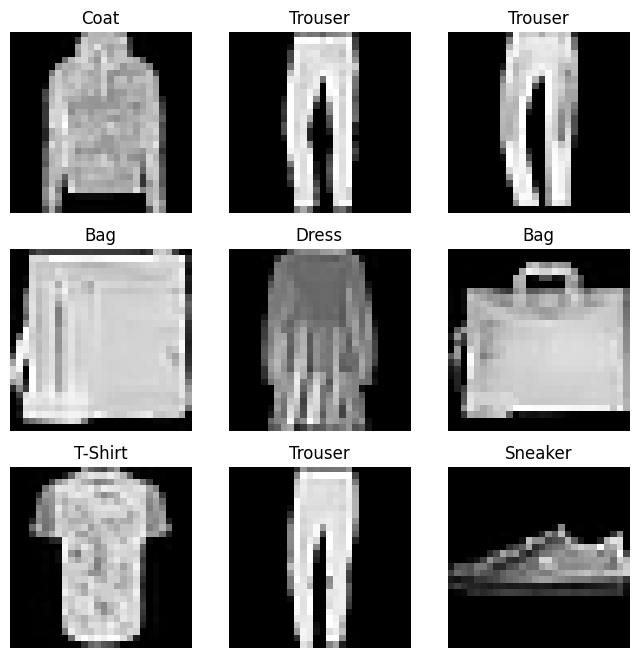

In [42]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

to understand :

In [44]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

on use un dataloader qui permet de faire des transformation sur les data, redistribuer etc de façon facile et multiprocessing

In [45]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


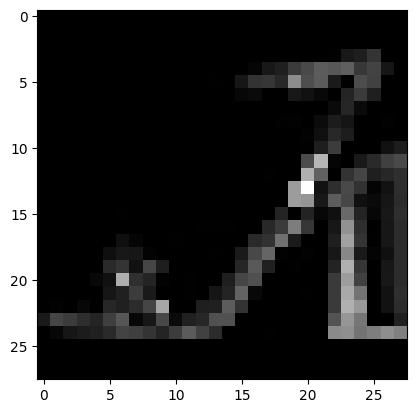

Label: 5


In [48]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Transformation

In [49]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

totensor => PIL image or ndarray to floattensor.
Lambda transform => user lambda function
https://pytorch.org/vision/stable/transforms.html


## Build the NN model

In [50]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [51]:
##Chose the good device
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


we devine the nn class using nn :

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [61]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


a try with minibatch of 3 image of 28*28

In [62]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


to do only 2D array

In [63]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [64]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [65]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0045,  0.1200, -0.1361,  0.0687,  0.0949,  0.1400, -0.0066,  0.0367,
         -0.1696, -0.0258, -0.3087, -0.1778, -0.1704,  0.4306, -0.2328, -0.0240,
          0.3738,  0.2243, -0.6334, -0.0069],
        [-0.0173,  0.3446,  0.0974,  0.2446,  0.3338,  0.4544,  0.0885,  0.1563,
         -0.1180, -0.1179, -0.5783, -0.0975, -0.5412,  0.0466, -0.3874, -0.2040,
          0.5517,  0.0482, -0.3922, -0.2541],
        [-0.0268,  0.2150,  0.1843, -0.1385,  0.1439,  0.5906, -0.1024, -0.0040,
         -0.2703,  0.0775, -0.4632,  0.0124, -0.4929,  0.4290, -0.1366,  0.0102,
          0.3248,  0.0232, -0.3479, -0.1237]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0045, 0.1200, 0.0000, 0.0687, 0.0949, 0.1400, 0.0000, 0.0367, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.4306, 0.0000, 0.0000, 0.3738, 0.2243,
         0.0000, 0.0000],
        [0.0000, 0.3446, 0.0974, 0.2446, 0.3338, 0.4544, 0.0885, 0.1563, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0466, 0.00

pas trop compris non linéarité

In [66]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

permet de refaire pareil dans un sens

In [67]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

permet de transformer en proba

In [68]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0131, -0.0265,  0.0029,  ...,  0.0097, -0.0184,  0.0149],
        [-0.0159,  0.0335, -0.0121,  ...,  0.0113,  0.0072, -0.0316]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0052, -0.0146], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0051,  0.0285, -0.0155,  ...,  0.0214, -0.0400,  0.0004],
        [-0.0204,  0.0353,  0.0080,  ..., -0.0178,  0.0335,  0.0317]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

Une façon d'acceder au paramettres

## AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD

In [73]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

compute les gradient :

In [74]:
loss.backward() #work only if required_grad = true before
print(w.grad)
print(b.grad)

tensor([[0.3317, 0.0015, 0.2054],
        [0.3317, 0.0015, 0.2054],
        [0.3317, 0.0015, 0.2054],
        [0.3317, 0.0015, 0.2054],
        [0.3317, 0.0015, 0.2054]])
tensor([0.3317, 0.0015, 0.2054])


In [76]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


en gros si on veux pas du grad on fait un with ou detach : 

To mark some parameters in your neural network as frozen parameters.

To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

aussi un truc aavec les matrices jacobienne

## OPTIMIZING MODEL PARAM

In [77]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [78]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss fun

In [80]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimize qui fait qq truc :

In [81]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Full impl

In [82]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

on augmente les loops (epoch)

In [83]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303688  [   64/60000]
loss: 2.292185  [ 6464/60000]
loss: 2.275231  [12864/60000]


KeyboardInterrupt: 